In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#データセットの定義 (1列目:x0, 2列目:x1, 3列目:x2, 4列目:t)
#ANDデータ
data = np.array([[1, 0, 0, 0],
                 [1, 1, 0, 0],
                 [1, 0, 1, 0],
                 [1, 1, 1, 1],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

In [13]:
#ORデータ
data = np.array([[1, 0, 0, 0],
                 [1, 1, 0, 1],
                 [1, 0, 1, 1],
                 [1, 1, 1, 1],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

In [24]:
#XORデータ
data = np.array([[1, 0, 0, 0],
                 [1, 1, 0, 1],
                 [1, 0, 1, 1],
                 [1, 1, 1, 0],
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

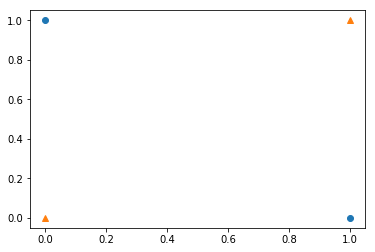

In [25]:
#グラフ表示
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == 0, 0], x[t == 0, 1], '^')

In [26]:
w = np.array([1.0,1.0,1.0]) #αの初期値の設定
eta = 0.1 #学習率
K = 1000 #繰り返し回数
f_value = [] #目的関数値
index = [] #繰り返し回数

In [27]:
#シグモイド関数
def sigmoid(w,x):
    return 1 / (1 + np.exp(-np.dot(w,x)))

2.772588722239782
[-4.21956139e-08  3.55738702e-08  3.55738702e-08]


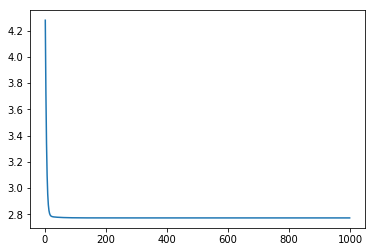

In [28]:
for k in range(K):
    #交差エントロピー誤差関数
    f = 0.0
    for i in range(len(data)):
        f += data[i][3] * np.log(sigmoid(w,data[i][0:3])) + (1 - data[i][3] ) * np.log(1 - sigmoid(w,data[i][0:3]))
    f *= -1
    w_sum = np.array([0.0,0.0,0.0]) #第１成分w0更新の和、第２成分w1, 第３成分w2
    #更新式の和の部分の計算
    for i in range(len(data)):
        for j in range(len(w)):
            w_sum[j] += (sigmoid(w,data[i][0:3]) - data[i][3]) * data[i][j] 
    #wの更新
    for j in range(len(w)):
        w[j] -= eta * w_sum[j]
    if(k > 0):
        index.append(k)
        f_value.append(f)
print(f)
print(w)
plt.plot(index, f_value)

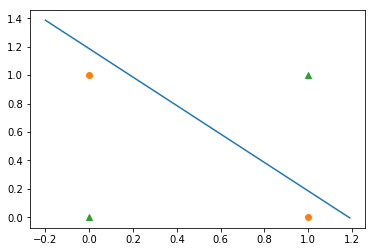

In [29]:
p = np.arange(-0.2, 1.2, 0.01)
q = -w[0]/w[2] - w[1]/w[2]*p
plt.plot(p, q)
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == 0, 0], x[t == 0, 1], '^')

In [30]:
sigmoid(w,data[0][0:3]) #(x1,x2)=(0,0)

0.49999998945109647

In [31]:
sigmoid(w,data[1][0:3]) #(x1,x2)=(1,0)

0.499999998344564

In [32]:
sigmoid(w,data[2][0:3]) #(x1,x2)=(0,1)

0.499999998344564

In [33]:
sigmoid(w,data[3][0:3]) #(x1,x2)=(1,1)

0.5000000072380316